# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [58]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import seaborn as sns
import urllib
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [59]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 556


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [60]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lon = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lon, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | crane
Processing Record 2 of Set 1 | udachny
Processing Record 3 of Set 1 | rosslau
Processing Record 4 of Set 1 | invercargill
Processing Record 5 of Set 1 | bethel
Processing Record 6 of Set 1 | utrik
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | vorgashor
Processing Record 9 of Set 1 | barah
Processing Record 10 of Set 1 | luganville
Processing Record 11 of Set 1 | wailua homesteads
Processing Record 12 of Set 1 | yellowknife
Processing Record 13 of Set 1 | ribeira grande
Processing Record 14 of Set 1 | thompson
Processing Record 15 of Set 1 | tiksi
Processing Record 16 of Set 1 | manaure
Processing Record 17 of Set 1 | susuman
Processing Record 18 of Set 1 | kodiak
Processing Record 19 of Set 1 | anadyr
Processing Record 20 of Set 1 | blackmans bay
Processing Record 21 of Set 1 | merizo village
Processing Record 22 of Set 1 | egilsstadir
Processing Record 23 

Processing Record 42 of Set 4 | kidal
Processing Record 43 of Set 4 | east london
Processing Record 44 of Set 4 | tsetserleg
Processing Record 45 of Set 4 | nova sintra
Processing Record 46 of Set 4 | sao jose da coroa grande
Processing Record 47 of Set 4 | grand falls-windsor
Processing Record 48 of Set 4 | st. john's
Processing Record 49 of Set 4 | ca mau
Processing Record 0 of Set 5 | hamilton
Processing Record 1 of Set 5 | tralee
Processing Record 2 of Set 5 | juneau
Processing Record 3 of Set 5 | atafu village
Processing Record 4 of Set 5 | saint-jean-de-maurienne
Processing Record 5 of Set 5 | priozersk
Processing Record 6 of Set 5 | buckhannon
Processing Record 7 of Set 5 | nabire
Processing Record 8 of Set 5 | nigde
Processing Record 9 of Set 5 | lebu
Processing Record 10 of Set 5 | ta`u
Processing Record 11 of Set 5 | bouake
Processing Record 12 of Set 5 | aoulef
Processing Record 13 of Set 5 | lihue
Processing Record 14 of Set 5 | kruisfontein
Processing Record 15 of Set 5 | 

Processing Record 33 of Set 8 | tabou
Processing Record 34 of Set 8 | antsiranana
Processing Record 35 of Set 8 | smidovich
Processing Record 36 of Set 8 | westport
Processing Record 37 of Set 8 | mount isa
Processing Record 38 of Set 8 | dalbandin
Processing Record 39 of Set 8 | gulf shores
Processing Record 40 of Set 8 | heihe
Processing Record 41 of Set 8 | papao
Processing Record 42 of Set 8 | rapar
Processing Record 43 of Set 8 | hafnarfjordur
Processing Record 44 of Set 8 | bobo-dioulasso
Processing Record 45 of Set 8 | nizao
Processing Record 46 of Set 8 | aconibe
Processing Record 47 of Set 8 | revelstoke
Processing Record 48 of Set 8 | detva
Processing Record 49 of Set 8 | lompoc
Processing Record 0 of Set 9 | baraki barak
Processing Record 1 of Set 9 | usogorsk
Processing Record 2 of Set 9 | mora
Processing Record 3 of Set 9 | tanout
Processing Record 4 of Set 9 | prince george
Processing Record 5 of Set 9 | lazaro cardenas
Processing Record 6 of Set 9 | sisimiut
Processing R

In [93]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          539
Lat           539
Lng           539
Max Temp      539
Humidity      539
Cloudiness    539
Wind Speed    539
Country       539
Date          539
dtype: int64

In [94]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,crane,31.3974,-102.3501,87.13,9,0,9.78,US,1683336435
1,udachny,66.4167,112.4000,32.45,92,100,7.23,RU,1683336436
2,rosslau,51.8833,12.2500,54.41,84,100,3.00,DE,1683336437
3,invercargill,-46.4000,168.3500,62.15,68,0,7.56,NZ,1683336230
4,bethel,41.3712,-73.4140,53.94,84,40,3.44,US,1683336438


In [95]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [96]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,crane,31.3974,-102.3501,87.13,9,0,9.78,US,1683336435
1,udachny,66.4167,112.4000,32.45,92,100,7.23,RU,1683336436
2,rosslau,51.8833,12.2500,54.41,84,100,3.00,DE,1683336437
3,invercargill,-46.4000,168.3500,62.15,68,0,7.56,NZ,1683336230
4,bethel,41.3712,-73.4140,53.94,84,40,3.44,US,1683336438


In [97]:
city_data_df.count()

City          539
Lat           539
Lng           539
Max Temp      539
Humidity      539
Cloudiness    539
Wind Speed    539
Country       537
Date          539
dtype: int64

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

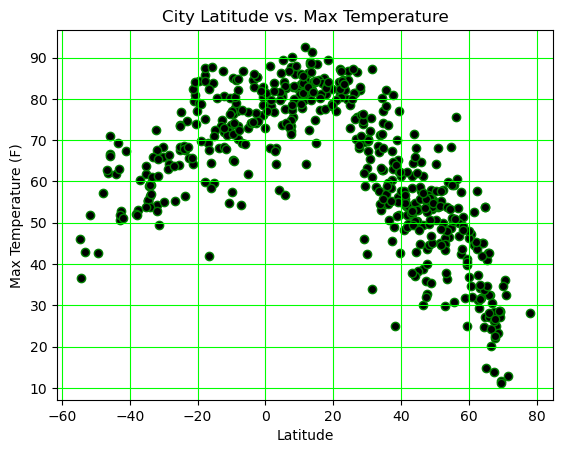

In [98]:
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],edgecolors="green",facecolors="black")
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (True,which="major",axis="both",linestyle="-",color="lime")
            
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

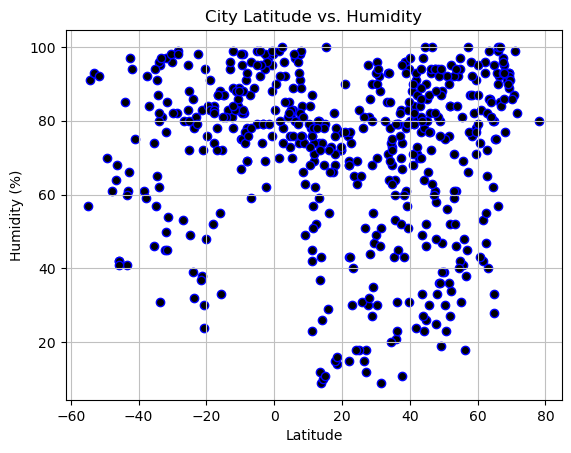

In [99]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],edgecolors="blue",facecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid (True,which="major",axis="both",linestyle="-",color="silver")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

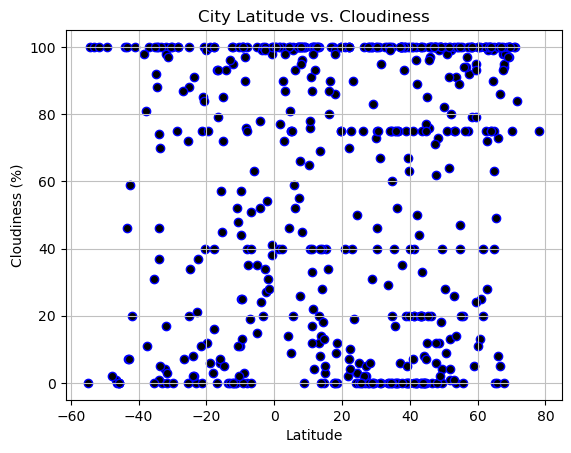

In [100]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],edgecolors="blue",facecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (True,which="major",axis="both",linestyle="-",color="silver")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

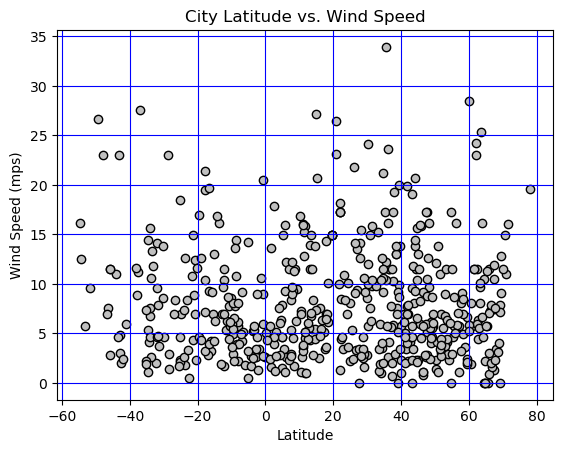

In [101]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],edgecolors="black",facecolors="silver")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mps)")
plt.grid (True,which="major",axis="both",linestyle="-",color="blue")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [104]:
Coor=round(linregress(city_data_df["Lat"],city_data_df["Max Temp"])[0],2)
line=linregress(city_data_df["Lat"],city_data_df["Max Temp"])
line

LinregressResult(slope=-0.28744478625416114, intercept=68.73223359939507, rvalue=-0.5265187424584838, pvalue=9.038273081198866e-40, stderr=0.020028845854501237, intercept_stderr=0.7565646837998035)

In [106]:
slope=-0.28744478625416114
intercept=68.73223359939507

In [118]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
north_hemisphere = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
north_hemisphere.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,crane,31.3974,-102.3501,87.13,9,0,9.78,US,1683336435
1,udachny,66.4167,112.4000,32.45,92,100,7.23,RU,1683336436
2,rosslau,51.8833,12.2500,54.41,84,100,3.00,DE,1683336437
4,bethel,41.3712,-73.4140,53.94,84,40,3.44,US,1683336438
5,utrik,11.2278,169.8474,80.76,76,100,16.02,MH,1683336438


In [119]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
south_hemisphere = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
south_hemisphere.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,invercargill,-46.4000,168.3500,62.15,68,0,7.56,NZ,1683336230
6,port-aux-francais,-49.3500,70.2167,42.78,70,100,26.64,TF,1683336439
9,luganville,-15.5333,167.1667,83.80,72,45,6.91,VU,1683336441
19,blackmans bay,-43.0167,147.3167,50.74,61,7,4.85,AU,1683336447
22,grytviken,-54.2811,-36.5092,36.72,91,100,12.48,GS,1683336448


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8587455014038723


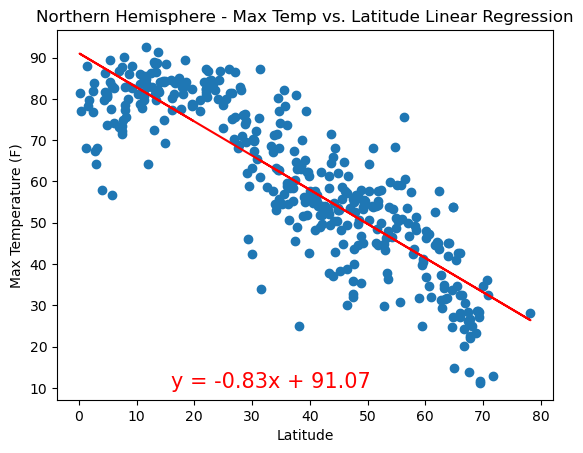

In [124]:
x_values = pd.to_numeric(north_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(north_hemisphere['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Linear regression on Northern Hemisphere
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(16,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')

print(f"The r-value is: {rvalue}")
plt.savefig("output_data/Fig5.png")

plt.show()

The r-value is: 0.6875902928687597


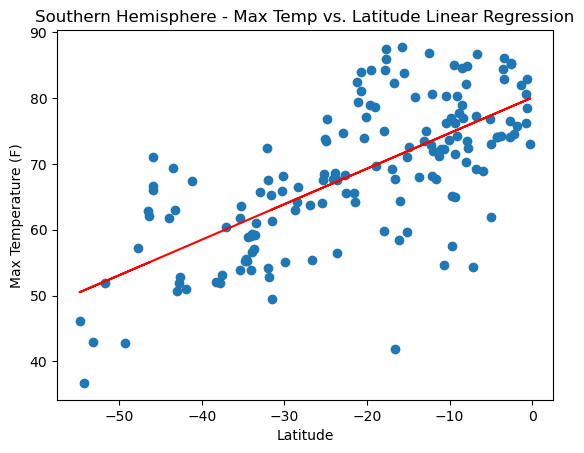

In [127]:
x_values = pd.to_numeric(south_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(south_hemisphere['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Linear regression on Southern Hemisphere
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(16,10),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')

print(f"The r-value is: {rvalue}")
plt.savefig("output_data/Fig6.png")

plt.show()

**Discussion about the linear relationship:** The closer you are to the equator will likely result in a higher temperature.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


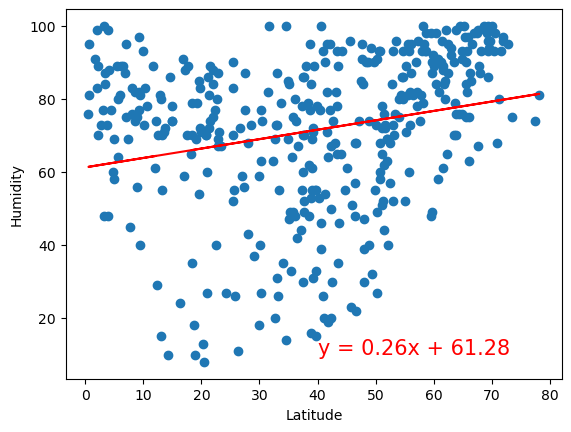

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.0002808747046324607


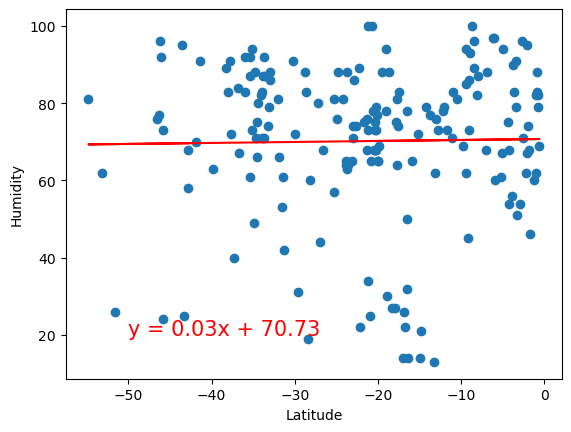

In [18]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


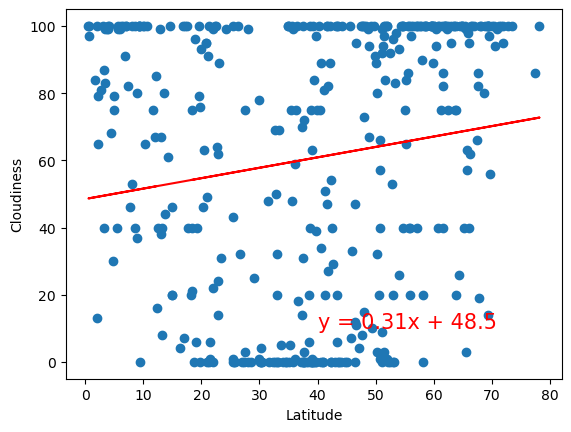

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.02056735429994368


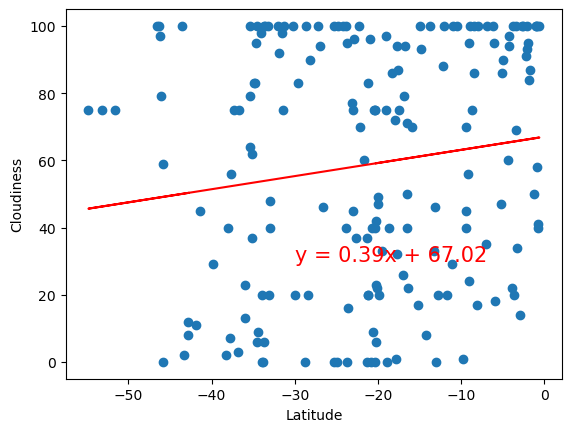

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


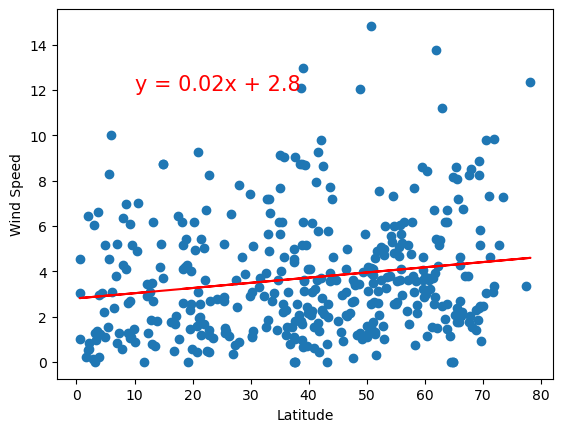

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.062239040700515696


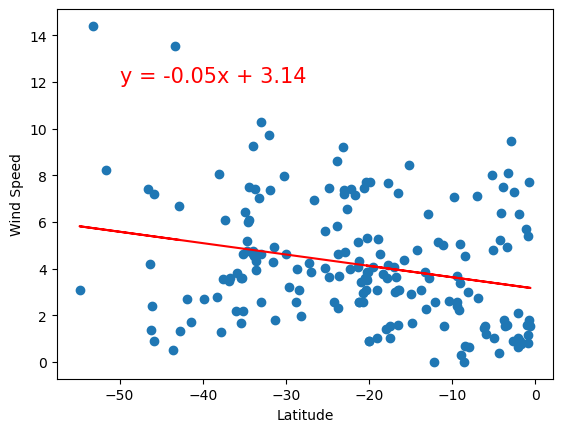

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE